<a href="https://colab.research.google.com/github/shreyansh111/Sentalmental-Analysis/blob/master/Major_Poject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as scs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/training.1600000.processed.noemoticon.csv",engine='python',header=None)
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
from wordcloud import WordCloud

x=df.iloc[:,-1].to_string()
print(x) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(df.iloc[:,-1].to_string())


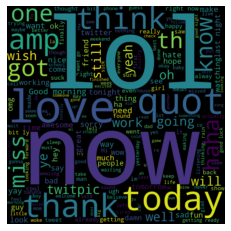

In [5]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [6]:
x=df.iloc[:,-1].values
y=df.iloc[:,0].values

In [8]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=125)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import  MultinomialNB

In [31]:
text_model=Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])

In [32]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [33]:
y_pred=text_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 4])

In [34]:
y_test

array([4, 0, 0, ..., 4, 0, 4])

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
accuracy_score(y_pred,y_test)*100

77.17375

In [37]:
confusion_matrix(y_pred,y_test)

array([[196552,  66223],
       [ 43343, 173882]])

In [38]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78    262775
           4       0.72      0.80      0.76    217225

    accuracy                           0.77    480000
   macro avg       0.77      0.77      0.77    480000
weighted avg       0.78      0.77      0.77    480000

